In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

KstestResult(statistic=0.0016113511712065876, pvalue=0.41680099221006583)
(0, 1.0008002306364012)
1.5970461049454627
1.5957691216057308
KstestResult(statistic=0.0032130856100840988, pvalue=0.2526352322098052)


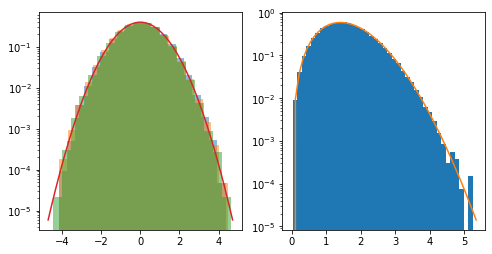

In [70]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
n = 100000
error = 1*np.random.randn(n,3)

ax[0].hist(error[:,0],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,1],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,2],bins=20,alpha=0.5,density=True)

lim = np.max(np.abs(error))+0.1
x = np.linspace(-lim,lim)
args = stats.norm.fit(error,floc=0)
print(stats.kstest(error.flatten(),'norm',args))
ax[0].plot(x,stats.norm.pdf(x,*args))
ax[0].set_yscale('log')

error_norm = np.linalg.norm(error,axis=-1)
ax[1].hist(error_norm,bins=40,density=True)

print(args)
print(stats.maxwell.mean(*args))
print(stats.maxwell.mean(*args)/args[1])
x = np.linspace(0,np.max(error_norm)+0.1)
# args = stats.maxwell.fit(error_norm.flatten(),floc=0)
print(stats.kstest(error_norm,'maxwell',args))
ax[1].plot(x,stats.maxwell.pdf(x,*args))
ax[1].set_yscale('log')

(0, 1.7275622235170542)
KstestResult(statistic=0.0016597731927274206, pvalue=0.37988424485654626)
(0, 0.9973597967638687)
KstestResult(statistic=0.002718983610438541, pvalue=0.44974088708884463)


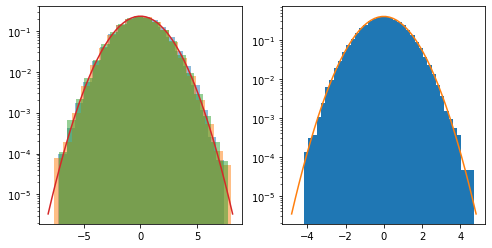

In [44]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
n = 100000
error = 1.9*np.random.randn(n,3)

ax[0].hist(error[:,0],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,1],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,2],bins=20,alpha=0.5,density=True)

lim = np.max(np.abs(error))+0.1
x = np.linspace(-lim,lim)
args = stats.norm.fit(error,floc=0)
print(args)
print(stats.kstest(error.flatten(),'norm',args))
ax[0].plot(x,stats.norm.pdf(x,*args))
ax[0].set_yscale('log')

error_mean = np.mean(error,axis=-1)
ax[1].hist(error_mean,bins=40,density=True)

lim = np.max(np.abs(error_mean))+0.1
x = np.linspace(-lim,lim)
args = stats.norm.fit(error_mean,floc=0)
print(args)
print(stats.kstest(error_mean,'norm',args))
ax[1].plot(x,stats.norm.pdf(x,*args))
ax[1].set_yscale('log')

(0, 1.0006932281690846)
KstestResult(statistic=0.0044048151042729855, pvalue=0.6038306018074968)
KstestResult(statistic=0.0022781246204203187, pvalue=0.6761655209355018)
Maxwell mean:  [1.59576912 2.59646235]
(1.5987028889796266, 0.2154284019101844)
KstestResult(statistic=0.010405201292240152, pvalue=0.22749284354476473)


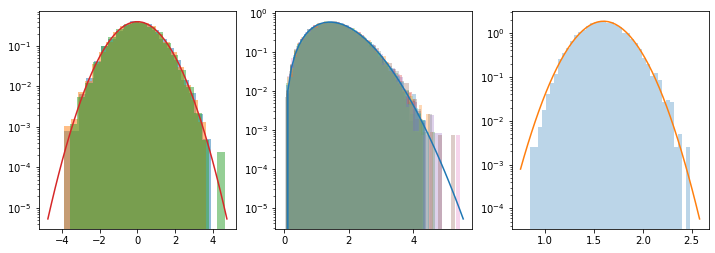

In [65]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
n = 10000
std = 1
error = std*np.random.randn(n,3)

ax[0].hist(error[:,0],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,1],bins=20,alpha=0.5,density=True)
ax[0].hist(error[:,2],bins=20,alpha=0.5,density=True)

lim = np.max(np.abs(error))+0.1
x = np.linspace(-lim,lim)
args = stats.norm.fit(error,floc=0)
print(args)
print(stats.kstest(error.flatten(),'norm',args))
ax[0].plot(x,stats.norm.pdf(x,*args))
ax[0].set_yscale('log')

nensembles = 10

error = std*np.random.randn(nensembles,n,3)
error_norm = np.linalg.norm(error,axis=-1)
for n in range(nensembles):
    ax[1].hist(error_norm[n],bins=40,density=True,alpha=0.3)

x = np.linspace(0,np.max(error_norm)+0.1)
# args = stats.maxwell.fit(error_mean,floc=0)
# print(args)
print(stats.kstest(error_norm.flatten(),'maxwell',args))
ax[1].plot(x,stats.maxwell.pdf(x,*args))
ax[1].set_yscale('log')
print('Maxwell mean: ', stats.maxwell.mean(args))

error_norm_mean = error_norm.mean(axis=0)
ax[2].hist(error_norm_mean,bins=40,density=True,alpha=0.3)
x = np.linspace(np.min(error_norm_mean)-0.1,np.max(error_norm_mean)+0.1)
args = stats.norm.fit(error_norm_mean)
print(args)
print(stats.kstest(error_norm_mean.flatten(),'norm',args))
ax[2].plot(x,stats.norm.pdf(x,*args))
ax[2].set_yscale('log')

In [52]:
error_norm.shape

(1, 10000)